# Маркетинговый анализ продвижения на рынок приложения Procrastinate Pro+

В роли маркетингого аналитика развлекательного приложения Procrastinate Pro+ необходимо разобраться в причинах убытков компании, несмотря на огромные вложения в рекламу в теченит несколькоких месяцев, и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Описание данных:
В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`
- заказы: `/datasets/orders_info_short.csv`
- расходы: `/datasets/costs_info_short.csv`

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импортируем необходимые для работы библиотеки и настраиваем отображение

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime as dt, timedelta
import time
from datetime import datetime
from datetime import date, timedelta as td

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# прочитаем таблицы и сохраним в датафреймы

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# небольшая функция, которой обычно пользуюсь...

def df_info(df_name):
    display(df_name.head(10))
    display(df_name.info())
    display(df_name.duplicated().sum())

Для начала изучим БД visits

In [4]:
df_info(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

0

Видим возможность поправить названия столбцов, а так же поправить тип данных в данной бд. Одинаковых строк не обнаружено.


In [5]:
# поправим названия столбцов

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]

In [6]:
# приведем тип данных в столбцах с датой и временем к формату datetime

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Углубимся в данные уже по столбцам, чтобы понять из чего вообще состоит бд. 

In [7]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

Уникальных пользователей у нас 150008. Самый частотный пользователь мелькал в наших логах 46 раз


In [8]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

Имеются данные о пользователях из 4х стран - США, Великобритании, Франции, Германии.

In [9]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Среди данных об устройствах в логах представлены iPhone, Android, PC, Mac. Больше всего в логах пользователей iPhone (112603).

О таблицах dt мы узнали из общей информации, что нулевых значений нет, пока этого хватит.  

Вызовем таблицу еще раз, чтобы проверить наши небольшие исправления.

In [10]:
df_info(visits)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

0

Перейдем к данным о заказах.

In [11]:
df_info(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

0

Так же поправим названия столбцов и тип dt. Дубликатов не видно..


In [12]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]

In [13]:
# преобразование данных о времени
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Пробежимся по данным и проверим их на корректность. Для этого воспользуемся методом describe() для численных строк и методами .unique()/.value_counts() для категориальных данных.

In [14]:
orders['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

В логах о заказах у нас присутствует 8881 уникальный пользователь, самый часто заказывающий - пользователь с user_id 901180916748.

В 'event_dt' нет нулевых значений и это самое главное... Но хоть посмотрим на какой период эта информация.

In [15]:
orders['event_dt'].max() - orders['event_dt'].min()

Timedelta('183 days 23:28:45')

In [16]:
orders['revenue'].describe()

count   40,212.00
mean         5.37
std          3.45
min          4.99
25%          4.99
50%          4.99
75%          4.99
max         49.99
Name: revenue, dtype: float64

В среднем каждый заказ совершается на сумму 5.37 (Долларов?). Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99. Вполне вероятно, что это оплата какой-то подписки.

Вызовем таблицу еще раз, чтобы проверить наши небольшие исправления.

In [17]:
df_info(orders)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

0

Перейдем к данным о рекламных тратах.

In [18]:
df_info(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
5,2019-05-06,FaceBoom,118.80
6,2019-05-07,FaceBoom,101.20
7,2019-05-08,FaceBoom,100.10
8,2019-05-09,FaceBoom,93.50
9,2019-05-10,FaceBoom,104.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

0

Уже знакомы алгоритм -_-

In [19]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [20]:
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt'])

Пробежимся по данным и проверим их на корректность. Для этого воспользуемся методом describe() для численных строк и методами .unique()/.value_counts() 

In [21]:
costs['dt'].max() - costs['dt'].min()

Timedelta('179 days 00:00:00')

В логах собраны данные за 179 дней.

In [22]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

В выгрузке представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'

In [23]:
costs['costs'].describe()

count   1,800.00
mean       58.61
std       107.74
min         0.80
25%         6.50
50%        12.29
75%        33.60
max       630.00
Name: costs, dtype: float64

Cредние и медианные затраты на маркетинг разнятся (58.6 и 12.2 соответственно) - возможно, что на какие-то каналы уходит бльше трат, на какие-то меньше. Максимальная трата на маркетинг - 630, минимальные - 0.8.



**Вывод**

На данном этапе мы положили данные о визитах, заказах и рекламных тратах в переменные и подготовили данные к анализу. Типы данных во всех колонках соответствуют нужным значениям. Дубликатов не обнаружено, как и нулевых значений.

Уникальных пользователей у нас 150008. Самый частотный пользователь мелькал в наших логах 46 раз. В бд имеются данные о пользователях из 4х стран - США, Англии, Франции, Германии. Среди данных об устройствах в логах представлены iPhone, Android, PC, Mac. Больше всего в логах пользователей iPhone (112603). 

В логах о заказах у нас присутствует 8881 уникальный пользователь, самый часто заказывающий - пользователь 901180916748. Информацией о заказах за 183 дня. В среднем каждый заказ совершается на сумму 5.37 у.е. Медиана и среднее довольно близко расположены, можно предположить, что сильных выбрососв в данных нет. Также видим, что 1, 2, 3 и 4 квантили - все они равны 4.99.

Всего 1800 строк с данными о затратах на маркетинг. В логах собраны данные за 179 дней. В выгрузке представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds' Средние и медианные затраты на маркетинг разнятся (58.6 и 12.2 соответственно). Максимальная трата на маркетинг - 630 у.е., минимальные - 0.8.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Из условия -момент анализа у нас 01.11.2019, а горизонт анализа - 14 дней. 

In [24]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

In [25]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [26]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [30]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [32]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**Вывод:**

Заданы основные функции для расчета и анализа удержания, конверсии, LTV и ROI.

### Исследовательский анализ данных

#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

In [33]:
# получаем профили пользователей

profiles = get_profiles(visits, orders, costs)
display(profiles.head(10)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.00
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.00
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.01
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.13
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.25


Определим минимальную и максимальную даты привлечения пользователей.

In [34]:
# доступный интервал привлечения пользователей

min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()  

print(min_analysis_date)
print(max_analysis_date)

2019-05-01 00:00:00
2019-10-27 00:00:00


**Вывод:**

Минимальная дата привлечения пользователей - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года.

#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [35]:
# построим таблицу, отражающую количество пользователей и их долю из каждой страны.

region_ratio = pd.DataFrame()
region_ratio['users_cnt'] = profiles.groupby('region')['user_id'].count()
region_ratio['ratio'] = ((region_ratio['users_cnt'] / profiles['region'].count()) * 100)
region_ratio.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2f}%'})

,users_cnt,ratio
region,,
United States,100002,66.66%
UK,17575,11.72%
France,17450,11.63%
Germany,14981,9.99%


Судя по резльтатам, бОльшая доля пользователей - это люди из США (66.66%). Далее идут примерно равные доли пользователей из Англии и Франции (~ 12%). Меньше всего пользователей из Германии (~ 10%).

In [36]:
# теперь посмотрим на платящих пользователей и долю платящих из каждой страны.

region_payer_ratio = pd.DataFrame()
region_payer_ratio['users_cnt'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_payer_ratio['ratio'] = ((region_payer_ratio['users_cnt'] / profiles.query('payer == True')['region'].count()) * 100)
region_payer_ratio.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2f}%'})

,users_cnt,ratio
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


Платящие пользователи из США лидируют (78%), доли платящих из Франции и Англии примерно равны (7-8%), меньше всего платящих пользователей из Германии (~ 7%)

In [37]:
# рассчитаем долю платящих пользователей отдельно по странам.

def pivot_ratio_result(column, df):
    result = pd.DataFrame()
    result['users_cnt'] = df.groupby(column)['user_id'].count()
    result['users_ratio'] = ((result['users_cnt'] / df[column].count()) * 100)
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count()
    result['payer_ratio'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)
    return result.sort_values(by='users_ratio', ascending=False).style.format({'users_ratio': '{:.2f}%', 'payer_ratio': '{:.2f}%'})

pivot_ratio_result('region', profiles)

,users_cnt,users_ratio,payer_users_cnt,payer_ratio
region,,,,
United States,100002,66.66%,6902,6.90%
UK,17575,11.72%,700,3.98%
France,17450,11.63%,663,3.80%
Germany,14981,9.99%,616,4.11%


**Вывод:**

Видим, что доля платящих пользователей из США - 6.90%. Среди пользователей из Англии (17575) платящий сегмент составляет 3.98% (700 человек). Примерно такое же соотношение и для пользователей из Франции (3.80% платящих пользователей). Среди пользователей Германии (14981 человека) 616 человек - платящие (это 4.1%).

#### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

Узнаем, какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи.

In [38]:
device_ratio = pd.DataFrame()
device_ratio['users_cnt'] = profiles.groupby('device')['user_id'].count()
device_ratio['ratio'] = ((device_ratio['users_cnt'] / profiles['device'].count()) * 100)
device_ratio.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2f}%'})

,users_cnt,ratio
device,,
iPhone,54479,36.32%
Android,35032,23.35%
PC,30455,20.30%
Mac,30042,20.03%


Судя по таблице, большинство пользователей - это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%).

In [39]:
# Изучим распределение для платящих пользователей.

device_payer_ratio = pd.DataFrame()
device_payer_ratio['users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_payer_ratio['ratio'] = ((device_payer_ratio['users_cnt'] / profiles.query('payer == True')['device'].count()) * 100)
device_payer_ratio.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2f}%'})

,users_cnt,ratio
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


Ситуация для платящих пользователей повторяет общую картину (только MAC и PC поменялись местами). Основная доля платящих пользователей - это владельцы IPhone (38%). Далее идут владельцы Android (23%), Mac(21%) и PC(17%).

In [40]:
# Рассчитаем долю платящих пользователей отдельно по устройствам.

pivot_ratio_result('device', profiles)

,users_cnt,users_ratio,payer_users_cnt,payer_ratio
device,,,,
iPhone,54479,36.32%,3382,6.21%
Android,35032,23.35%,2050,5.85%
PC,30455,20.30%,1537,5.05%
Mac,30042,20.03%,1912,6.36%


**Вывод**

Больше всего доля платящих пользователей для устройства Mac: 6.36% (1912 человек) из 30042 платят за продукт. Среди пользователей iPhone (54479 человек) доля платящих равна 6.21%. Для пользователей Android (35032 человек) она составляет 5.85%. Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [41]:
channel_ratio = pd.DataFrame()
channel_ratio['users_cnt'] = profiles.groupby('channel')['user_id'].count()
channel_ratio['ratio'] = ((channel_ratio['users_cnt'] / profiles['channel'].count()) * 100)

channel_ratio['payer_users_cnt'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_ratio['payer_ratio'] = ((channel_ratio['payer_users_cnt'] / profiles.query('payer == True')['channel'].count()) * 100)

channel_ratio.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2f}%', 'payer_ratio': '{:.2f}%'})

,users_cnt,ratio,payer_users_cnt,payer_ratio
channel,,,,
organic,56439,37.62%,1160,13.06%
FaceBoom,29144,19.43%,3557,40.05%
TipTop,19561,13.04%,1878,21.15%
OppleCreativeMedia,8605,5.74%,233,2.62%
LeapBob,8553,5.70%,262,2.95%
WahooNetBanner,8553,5.70%,453,5.10%
RocketSuperAds,4448,2.97%,352,3.96%
MediaTornado,4364,2.91%,156,1.76%
YRabbit,4312,2.87%,165,1.86%


Если посмотреть на разбивку по источникам привлечения для всех пользователей (и платящих, и неплатящих), то можно заметить, что больше всего приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).

Для платящего сегмента пользователей картина несколько иная. Большинство платящих пользователей пришли через канал FaceBoom (40%), 21% из TipTop и только 13% - из органического трафика.

По остальным каналам распределение относительно равномерное. Самый непопулярный канал для всех сегментов пользователей - это lambdaMediaAds, для платящих - MediaTornado.

In [42]:
# рассчитаем долю платящих пользователей отдельно по каналам.
# исключим пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')
pivot_ratio_result('channel', profiles)

,users_cnt,users_ratio,payer_users_cnt,payer_ratio
channel,,,,
FaceBoom,29144,31.15%,3557,12.20%
TipTop,19561,20.91%,1878,9.60%
OppleCreativeMedia,8605,9.20%,233,2.71%
LeapBob,8553,9.14%,262,3.06%
WahooNetBanner,8553,9.14%,453,5.30%
RocketSuperAds,4448,4.75%,352,7.91%
MediaTornado,4364,4.66%,156,3.57%
YRabbit,4312,4.61%,165,3.83%
AdNonSense,3880,4.15%,440,11.34%


**Вывод**

Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%). Менее всего конвертируются пользователи из каналов OppleCreativeMedia (2.71%) и LeapBob (3.06%).

**Общий Вывод**

На данном этапе были сформированы профили пользователей. Для этого использовалась функция get_profiles(), в которую были переданы данные о посещениях, покупках и тратах на рекламу. Определены минимальная и максимальная даты привлечения пользователей. Это 2019-05-01 00:00:00 и 2019-10-27 00:00:00.

Построена таблица, отражающую количество пользователей и их долю из каждой страны. Судя по резльтатам, бОльшая доля пользователей - это люди из США (66.66%). Далее идут примерно равные доли пользователей из Англии и Франции (~ 12%). Меньше всего пользователей из Германии (~ 10%).

Изучены платящие пользователи и их долю из каждой страны. Платящие пользователи из США лидируют (78%), доли платящих из Франции и Англии примерно равны (7-8%), меньше всего платящих пользователей из Германии (~ 7%) Также выявлено, что доля платящих пользователей из США - 6.90%. Среди пользователей из Англии (17575) платящий сегмент составляет 3.98% (700 человек). Примерно такое же соотношение и для пользователей из Франции (3.80% платящих пользователей). Среди пользователей Германии (14981 человека) 616 человек - платящие (это 4.1%).

Изучено, какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи. Судя по таблице, большинство пользователей - это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%).

Больше всего доля платящих пользователей для устройства Mac: 6.36% (1912 человек) из 30042 платят за продукт.
Среди пользователей iPhone (54479 человек) доля платящих равна 6.21%. Для пользователей Android (35032 человек) она составляет 5.85%.
Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).
Исследованы рекламные источники привлечения и определены каналы, из которых пришло больше всего платящих пользователей. Если посмотреть на разбивку по источникам привлечения для всех пользователей (и платящих, и неплатящих), то можно заметить, что больше всего приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).

Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%).
Менее всего конвертируются пользователи из каналов OppleCreativeMedia (2.71%) и LeapBob (3.06%).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Посчитаем общую сумму расходов на маркетинг

In [43]:
# исползуем для этого таблицу costs
display(costs['costs'].sum())

105497.30000000002

Всего на маркетинг потрачено 105497.3 у.е.

In [44]:
costs.describe()

,costs
count,"1,800.00"
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


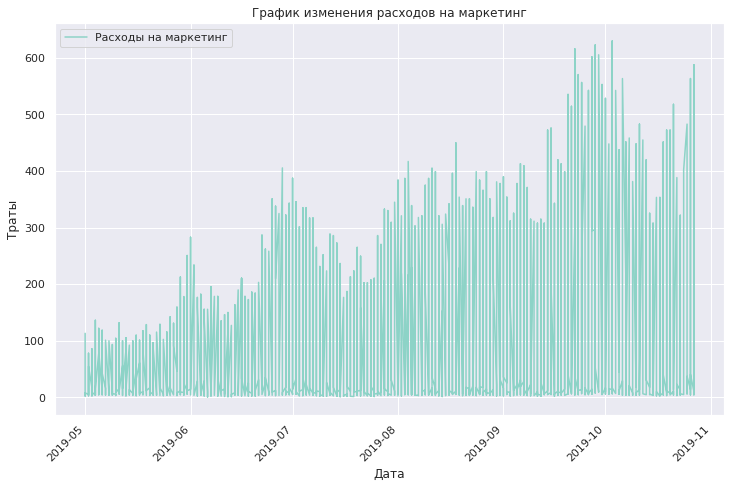

In [45]:
# построим график изменений расходов на маркетинг
costs.plot(y='costs', # столбец значений для вертикальной оси,
           x='dt',
           figsize=(12, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Расходы на маркетинг', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap='Set3') 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Видим уведичение расходов на маркетинг с течением времени. В конце сентября - начале октября они достигли пика в 630 у.е., после чего стали немного снижаться до 400, а затем к концу октября внось стремились к 600.

Выясним, как траты распределены по источникам.

In [46]:
channel_costs_report = pd.DataFrame()
channel_costs_report['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs_report['share'] = ((channel_costs_report['costs'] / costs['costs'].sum()) * 100)
channel_costs_report.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%', 'payer_share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Больше всего трат приходитя на источник TipTop (51.9%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

In [47]:
# добавим номер недели и месяц в таблицу costs
import calendar

costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month.apply(lambda x: calendar.month_name[x])
costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.30,18,May
1,2019-05-02,FaceBoom,78.10,18,May
2,2019-05-03,FaceBoom,85.80,18,May
3,2019-05-04,FaceBoom,136.40,18,May
4,2019-05-05,FaceBoom,122.10,18,May
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.00,43,October
1796,2019-10-24,lambdaMediaAds,6.40,43,October
1797,2019-10-25,lambdaMediaAds,8.80,43,October
1798,2019-10-26,lambdaMediaAds,8.80,43,October


<AxesSubplot:xlabel='month', ylabel='costs'>

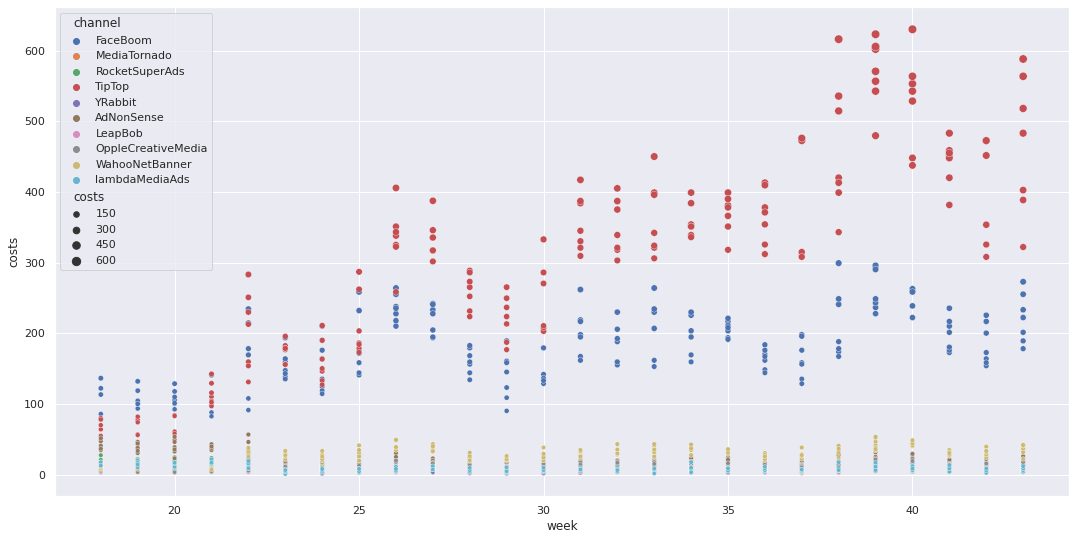

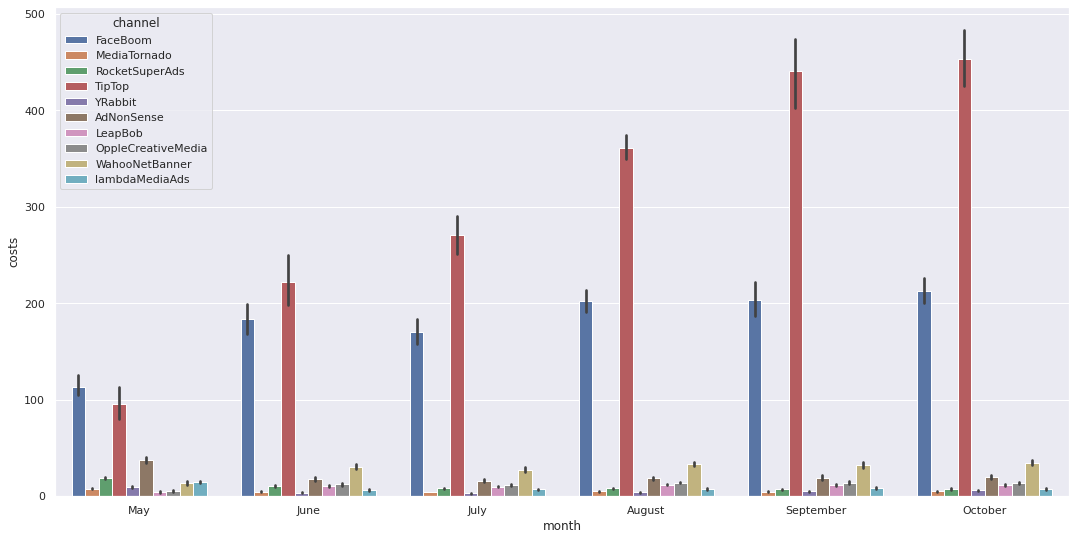

In [48]:
# строим графики трат на каналы по неделям и месцам 
plt.figure(figsize=(40,9))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=costs, 
    x="week", 
    y="costs", 
    hue="channel", 
    size="costs"
)

plt.figure(figsize=(40,9))
plt.subplot(1, 2, 2)
sns.barplot(data=costs, x="month", y="costs", hue="channel")

Наблюдаем, что в начале изучемого перида больше затрат было у FaceBoom, одако уже на 4-ю неделю изучаемого периода (21 неделя года) TipTop стал лидировать в тратах и продолжал их увеличивать на протяжении всего таймлайна.

Построим также более детализированные графики.

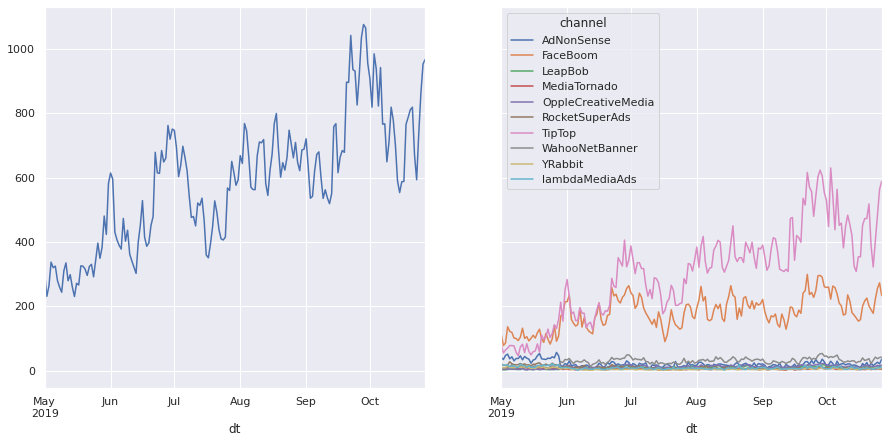

In [49]:
# визуализируем изменения метрик во времени.

total_costs = costs.groupby('dt')['costs'].sum()
ax1 = plt.subplot(1, 2, 1)
total_costs.plot(grid=True, ax=ax1, figsize=(15, 7))


channels_costs = costs.pivot_table(index='channel', columns='dt', values='costs', aggfunc='sum')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
channels_costs.T.plot(grid=True, ax=ax2, figsize=(15, 7))
plt.show()


Видим тут двух "активных игроков" - это TipTop и FaceBoom. Больше всего трафика закупали у TipTop и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник Tip-Top возрастают со временем. Остальные каналы привлечения обходятся довольно дешево

Узнаем, сколько в среднем стоило привлечение одного пользователя. Рассчитаем средний CAC на одного пользователя для всего проекта.

In [50]:
# посмотрим на CAC для каждого источника трафика.

cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [51]:
profiles['acquisition_cost'].mean()

1.1274813239427588

In [52]:
CAC_general = profiles.query('channel != "TipTop"')
CAC_general['acquisition_cost'].mean()

0.6856826289049833

Средний CAC для всего проекта составляет - 1.13. Но средний CAC без канала TipTop составляет - 0.69

Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01).

**Вывод:**

Всего на маркетинг потрачено 105497.3 у.е.

Выяснено, как траты распределены по источникам. Больше всего трат приходитя на источник TipTop (51.9%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

Визуализировано изменение метрик во времени. Заметны два "активных игрока" - это TipTop и FaceBoom. Больше всего трафика закупали у TipTop, и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. Остальные каналы привлечения обходятся довольно дешево.

Среди рекламных источников помимо TipTop и FaceBoom с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 53 у.е.). Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20 у.е.

Выяснено, сколько в среднем стоило привлечение одного пользователя из каждого источника.

Средний CAC для всего проекта составляет - 1.13. Но средний CAC без канала TipTop составляет - 0.69
Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01).

Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. 

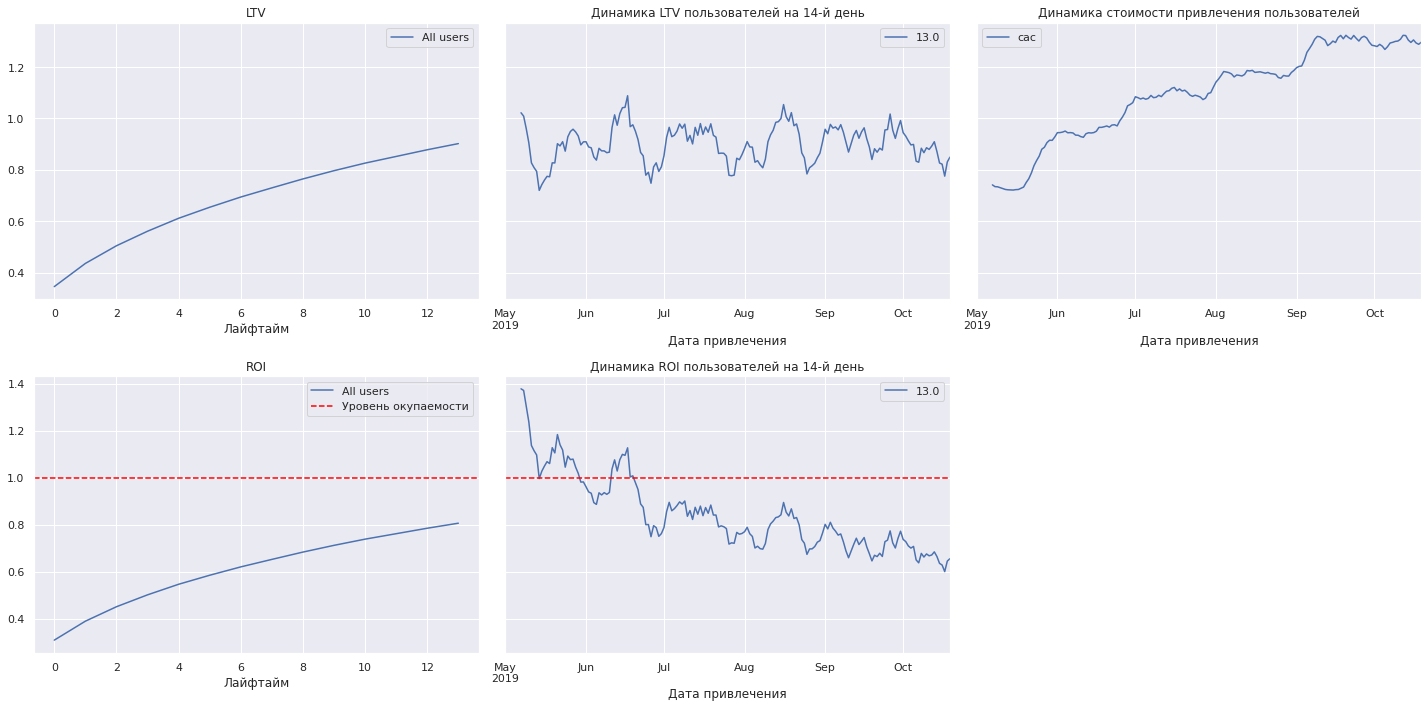

In [53]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупается к концу 2й недели. ROI — около 80%.
CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
ROI пользователей неумолимо падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.

- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

           cohort_size  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  \
cohort                                                                     
All users        88644 0.06 0.07 0.07 0.07 0.07 0.08 0.08 0.08 0.08 0.08   

           10.0  11.0  12.0  13.0  
cohort                             
All users  0.08  0.08  0.08  0.08  


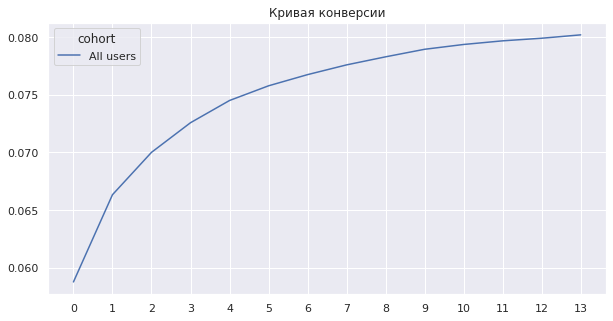

In [54]:
# считаем конверсию и строим кривую конверсии

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

print(conversion)  # таблица конверсии

report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(10, 5))
plt.title('Кривая конверсии')
plt.show() 

В идеале кривая должна начинаться на уровне конверсии первого дня и затем бесконечно приближаться к единице. До единицы нашей кривой ещё очень далеко, но закон роста напоминает эталонный.

       cohort_size    0    1    2    3    4    5    6    7    8    9   10  \
payer                                                                       
False        81334 1.00 0.18 0.09 0.05 0.03 0.02 0.02 0.01 0.01 0.01 0.01   
True          7310 1.00 0.38 0.29 0.24 0.21 0.19 0.17 0.16 0.15 0.14 0.14   

        11   12   13  
payer                 
False 0.01 0.01 0.00  
True  0.12 0.12 0.10  


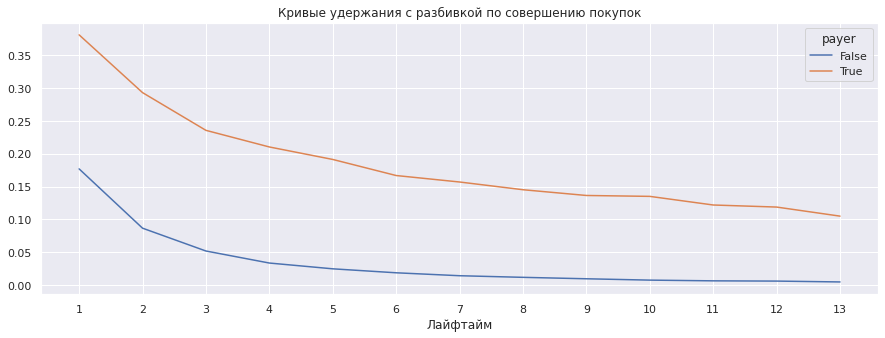

In [55]:
# считаем удержание и строим кривые удержания

retention_raw, retention, retention_history = get_retention(
    profiles, visits,  observation_date, horizon_days,
)

print(retention)  # таблица удержания

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show() 

Кривая удержания платящих пользователей выше, чем неплатящих и обе кривые постепенно снижаются.

- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

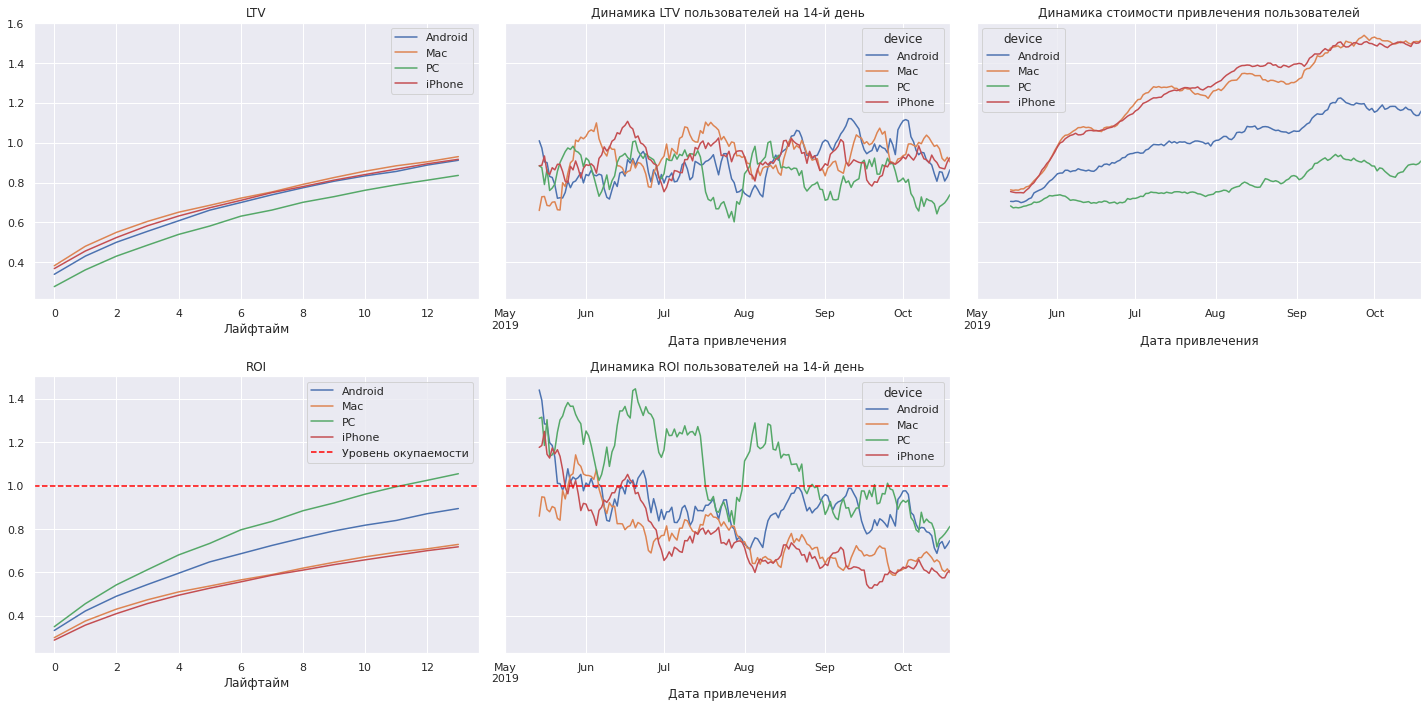

In [56]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи всех устройств окупались до июня, а потом что-то пошло не так, особенно для владельцев Mac и Iphone. LTV пользователей всё так же подвержен сезонности, но стабилен. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных. В целом, видим, что стоимость привлечения пользователей всех устройств росла за рассматриваемый период.

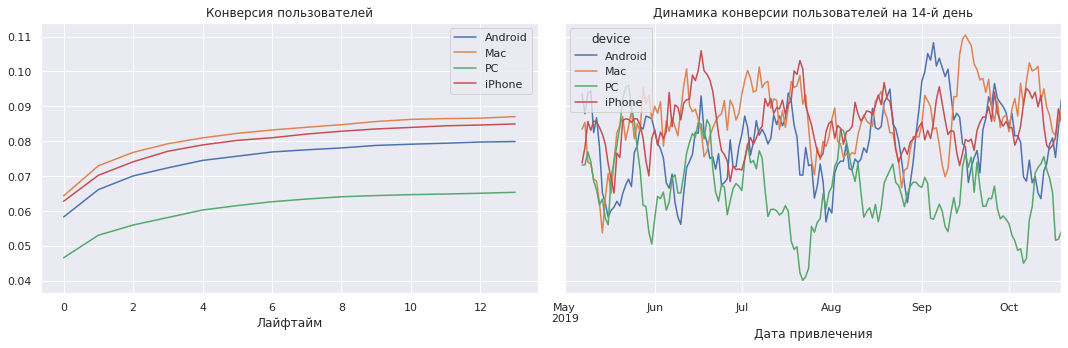

In [57]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, Android и iPhone конвертируются хорошо, причём постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

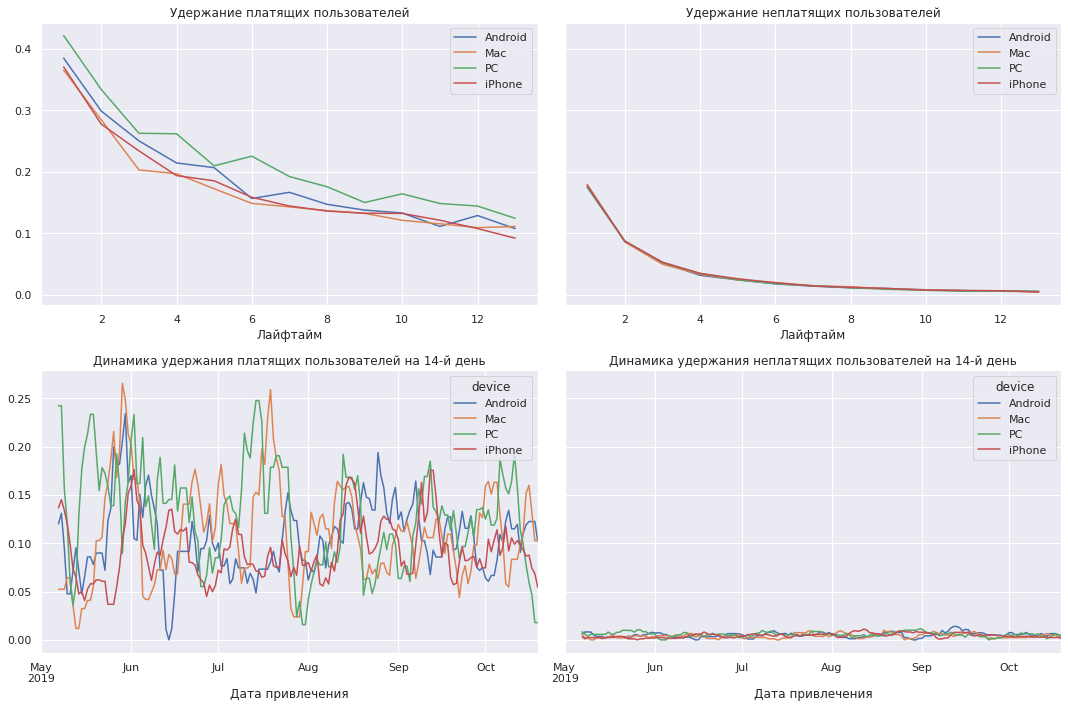

In [58]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Не видно, чтобы пользователи каких-то определенных устройств особо плохо удерживались. Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

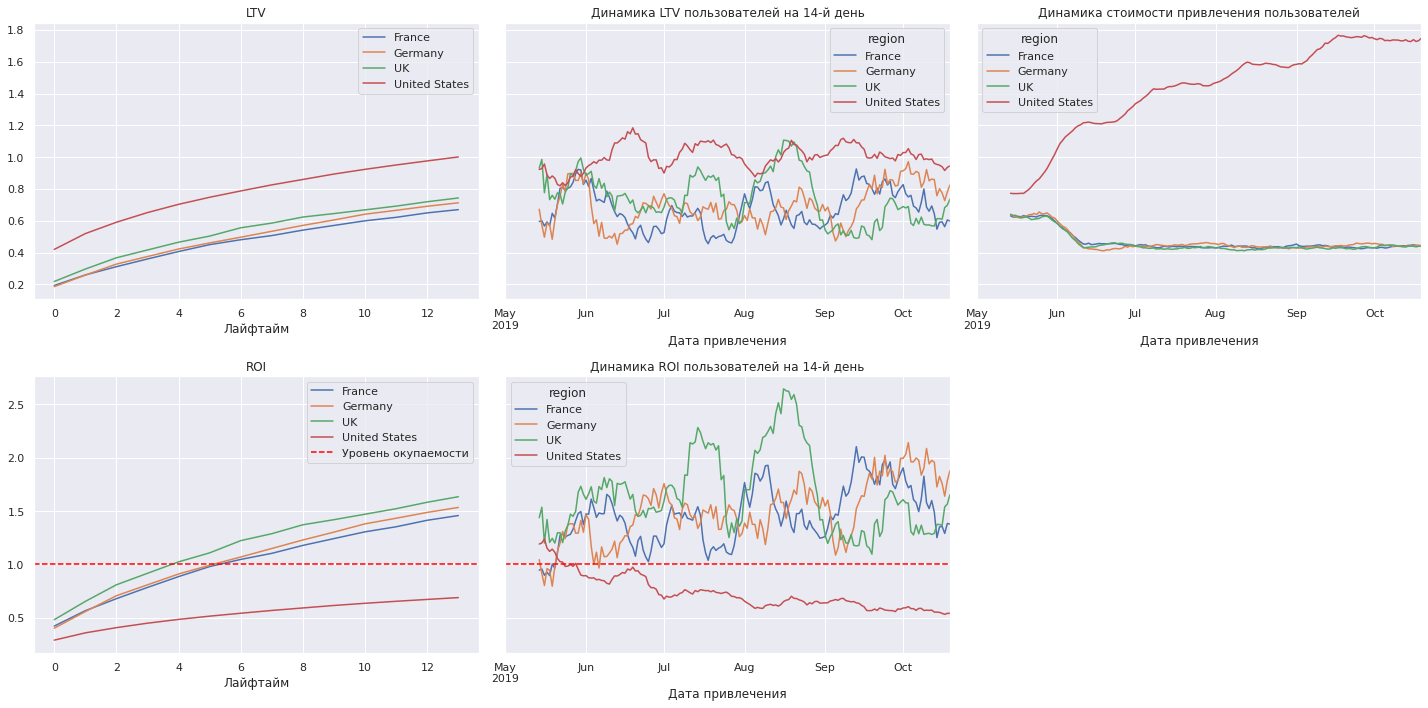

In [59]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США.
При этом стоимость привлечения пользователей из Америки - самая высокая. И она растет.
LTV всё так же подвержен сезонности, но стабилен.
Лучше всего окупается Великобритании и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года.

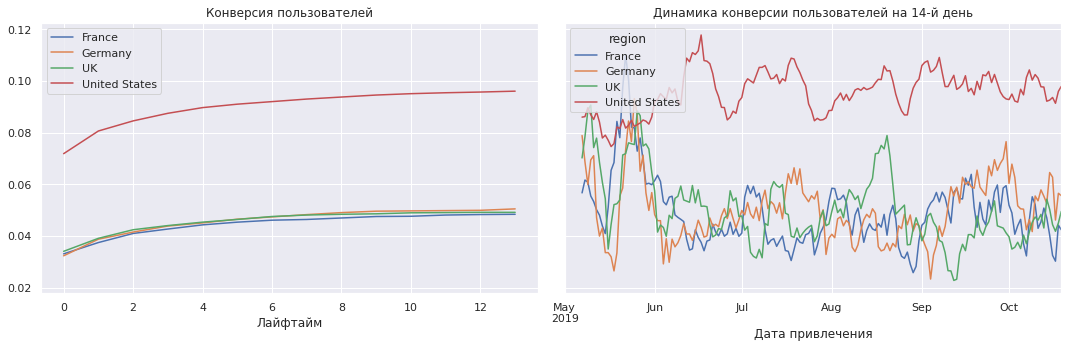

In [60]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Слабая конверсия у пользователей из Великобритании, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

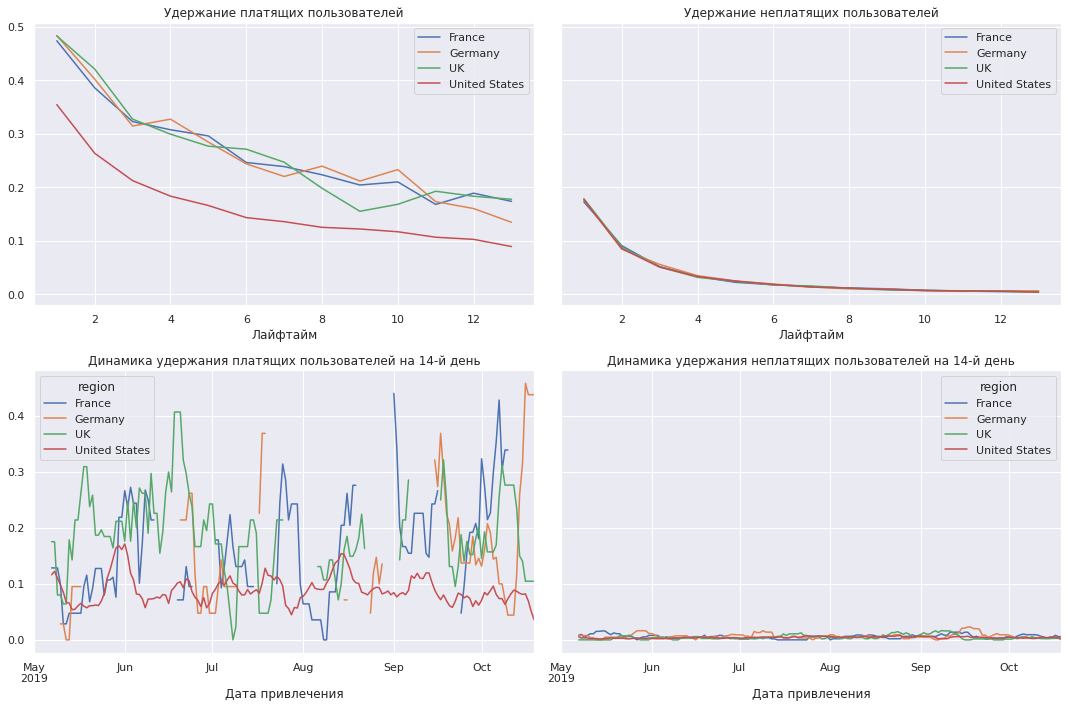

In [61]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим, что пользователи из США явно плохо удерживаются.

- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

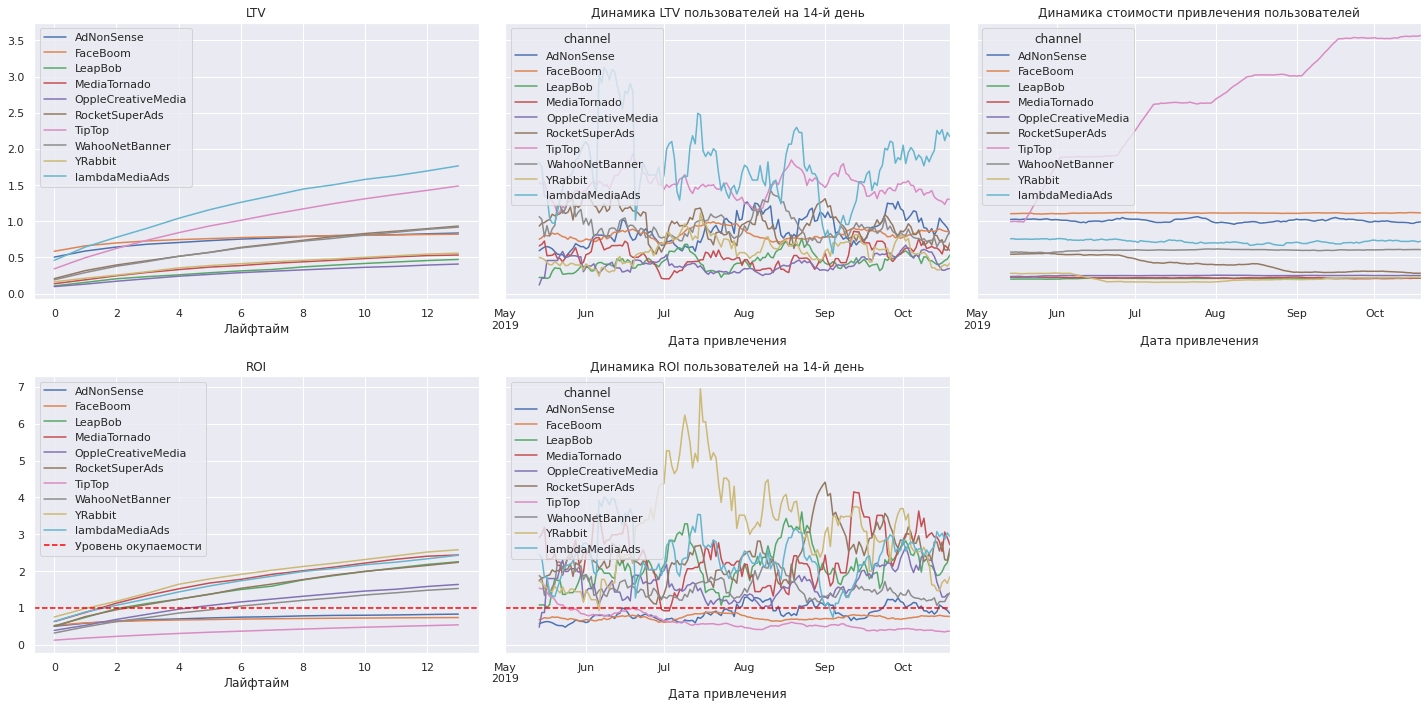

In [62]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Достаточно много средств было потрачено на эту рекламную сеть, но реальные результаты ниже ожидаемых. Не окупаются пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

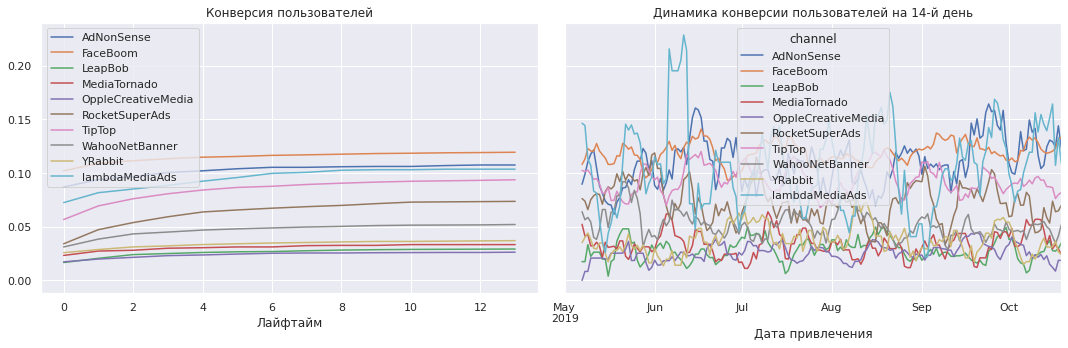

In [63]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit, LeapBob.

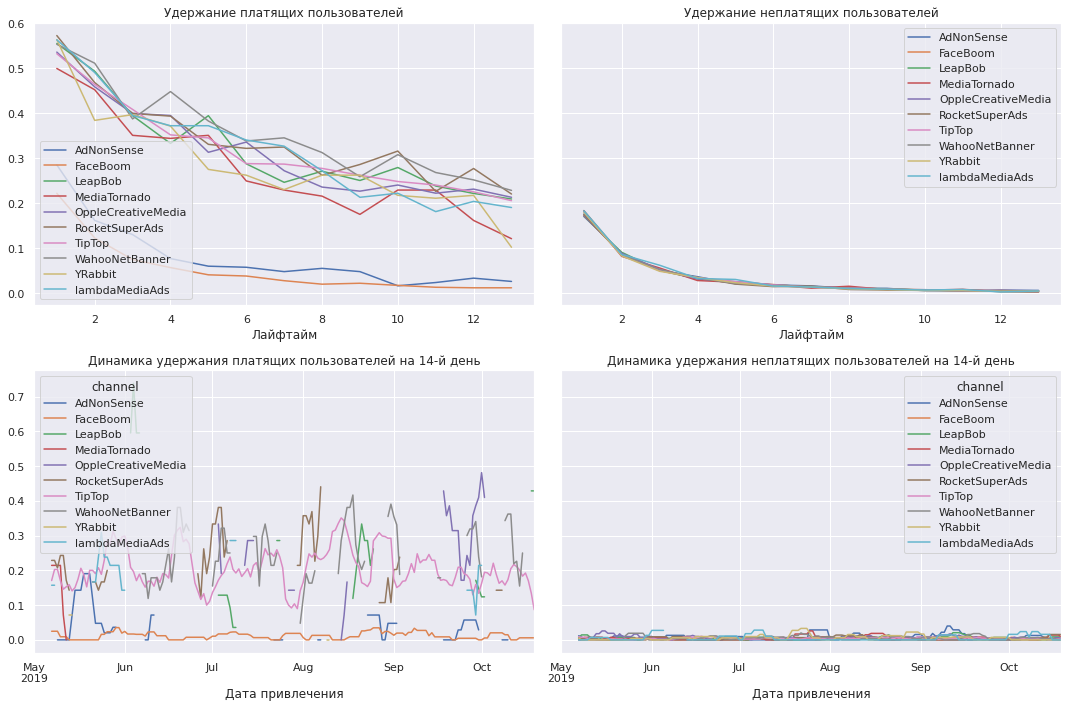

In [64]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видим явных аутсайдеров - плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Вывод
В целом, реклама близка к окупемости, если учитывать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения и то, что в анализ включены органические пользователи (не будем исключать влияние SEO). Реклама почти окупается к концу 2й недели. ROI — примерно 80% Окупаемость могут снижать владельцы Mac и iPhone, страна - США. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд), также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а основная аудитория - это пользователи из США при этом стоимость привлечения пользователей из Америки - самая высокая. Окупаемость пользователей начала падать с конца июня 2019 года.Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то изменения в продукте сыграли отрицательную роль, или статистику США портят люди с VPN... Нужно выяснить причины такой тенденции, а так нужно искать новые каналы для привлечения пользователей из Великобритании и Германии.

Хотелось бы выделить владельцев Mac и iPhone и Android - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает. Возможно, стоит рассмотреть какое-то маркетинговое предложение именно для владельцев лидирующих по оплате устройств успешных ОС, чтобы они приносили продукту большую денежную прибыль.

Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Достаточно много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось.
Не окупаются пользователи, привлеченные из каналов AdNonSense, FaceBoom, TipTop.
Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.
Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.
Явные аутсайдеры по удерживанию - пользователи из каналов FaceBoom и AdNonSense. Тут причины успеха или его отсутствия привлечения видимо исходит из контента каналов, и идет раздиление на разные группы людей, или сама рекламная компания изменялась от канала к каналу, поэтому где-то она была успешная, а где-то нет. Каналов AdNonSense, FaceBoom, TipTop обходятся дорого, а остальные каналы привлечения - дешево, возиожно стоило бы рассмотреть переключение внимания на более дешевые, но прибыльные каналы.